</p> <p style="text-align:center;"> <img src="https://images-ext-1.discordapp.net/external/8rgDaCvLqrqclKam5YznFYmsGOTU899pxnFf406bX4I/https/i.postimg.cc/tgyfnHYs/WHOlytics.png?format=webp&quality=lossless" alt="WHOlytics" width="200" style="float: right; margin-left: 0px;"/> </p> <p style="text-align:center;"> <img src="https://i.postimg.cc/9fQzwcLM/WHO-cropped.jpg" alt="WHO" style="float: center; margin-left: 0px;"/>
---

## 🌍 **WHOlytics**  
**Your Gateway to Data-Driven Global Health Insights**

---

🔬 **What is WHOlytics?**  
A cutting-edge **health analytics platform** that transforms raw global health data into **actionable insights** and **impactful visualisations**.

📊 **Our Mission**  
To bridge the gap between **healthcare** and **analytics**, empowering users with the tools to explore, understand, and improve public health through data.


---

<img src="https://i.postimg.cc/tgyfnHYs/WHOlytics.png" width="900px" height="400px"/>  

🧠 *Data meets health. Insight meets action. Welcome to WHOlytics.*  



## 1.🔍 **Exploratory Data Analysis (EDA)**  
**Uncover patterns, spot anomalies, and reveal the story behind the data.**

---

🛠 **Key Techniques Used**  
- 🔄 **Missing Value Analysis**: Null checks, imputation strategies
- 📏 Verifying data standardisation (e.g., percentages not mistakenly in decimal form)  
- 🧮 **Statistical Summaries**: Mean, median, mode, standard deviation  
- 📉 **Bivariate Analysis**: Scatter plots, correlation heatmaps  
- 📈 **Univariate Analysis**: Histograms, boxplots, value counts  
---

🎯 *Before we model, we explore. EDA turns raw data into meaningful insight.*  

---

### ✅ Let's Explore


#### Library Import & DataFrame Initialisation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.tools

df = pd.read_csv('https://drive.google.com/uc?id=1nXm7P-6nDbqiFYeJdZtwN5ARSNhXI4df&export=download')


#### 🔄 Null Value Check

In [ ]:
df.isnull().sum()    

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

#### 📏 Ensuring data standardisation
* Hepatitis B, Polio, Diphtheria are all recorded as percentages. Ensuring all values adhere to that

In [ ]:
df[['Hepatitis_B', 'Polio', 'Diphtheria']].agg(['min', 'max'])  

Hepatitis_B  Polio  Diphtheria
min           12      8          16
max           99     99          99

## 📉 Bivariate Analysis: Relationship between dependent and independent variables

In [ ]:
feat = list(df.columns)        
feat.remove('Life_expectancy')      

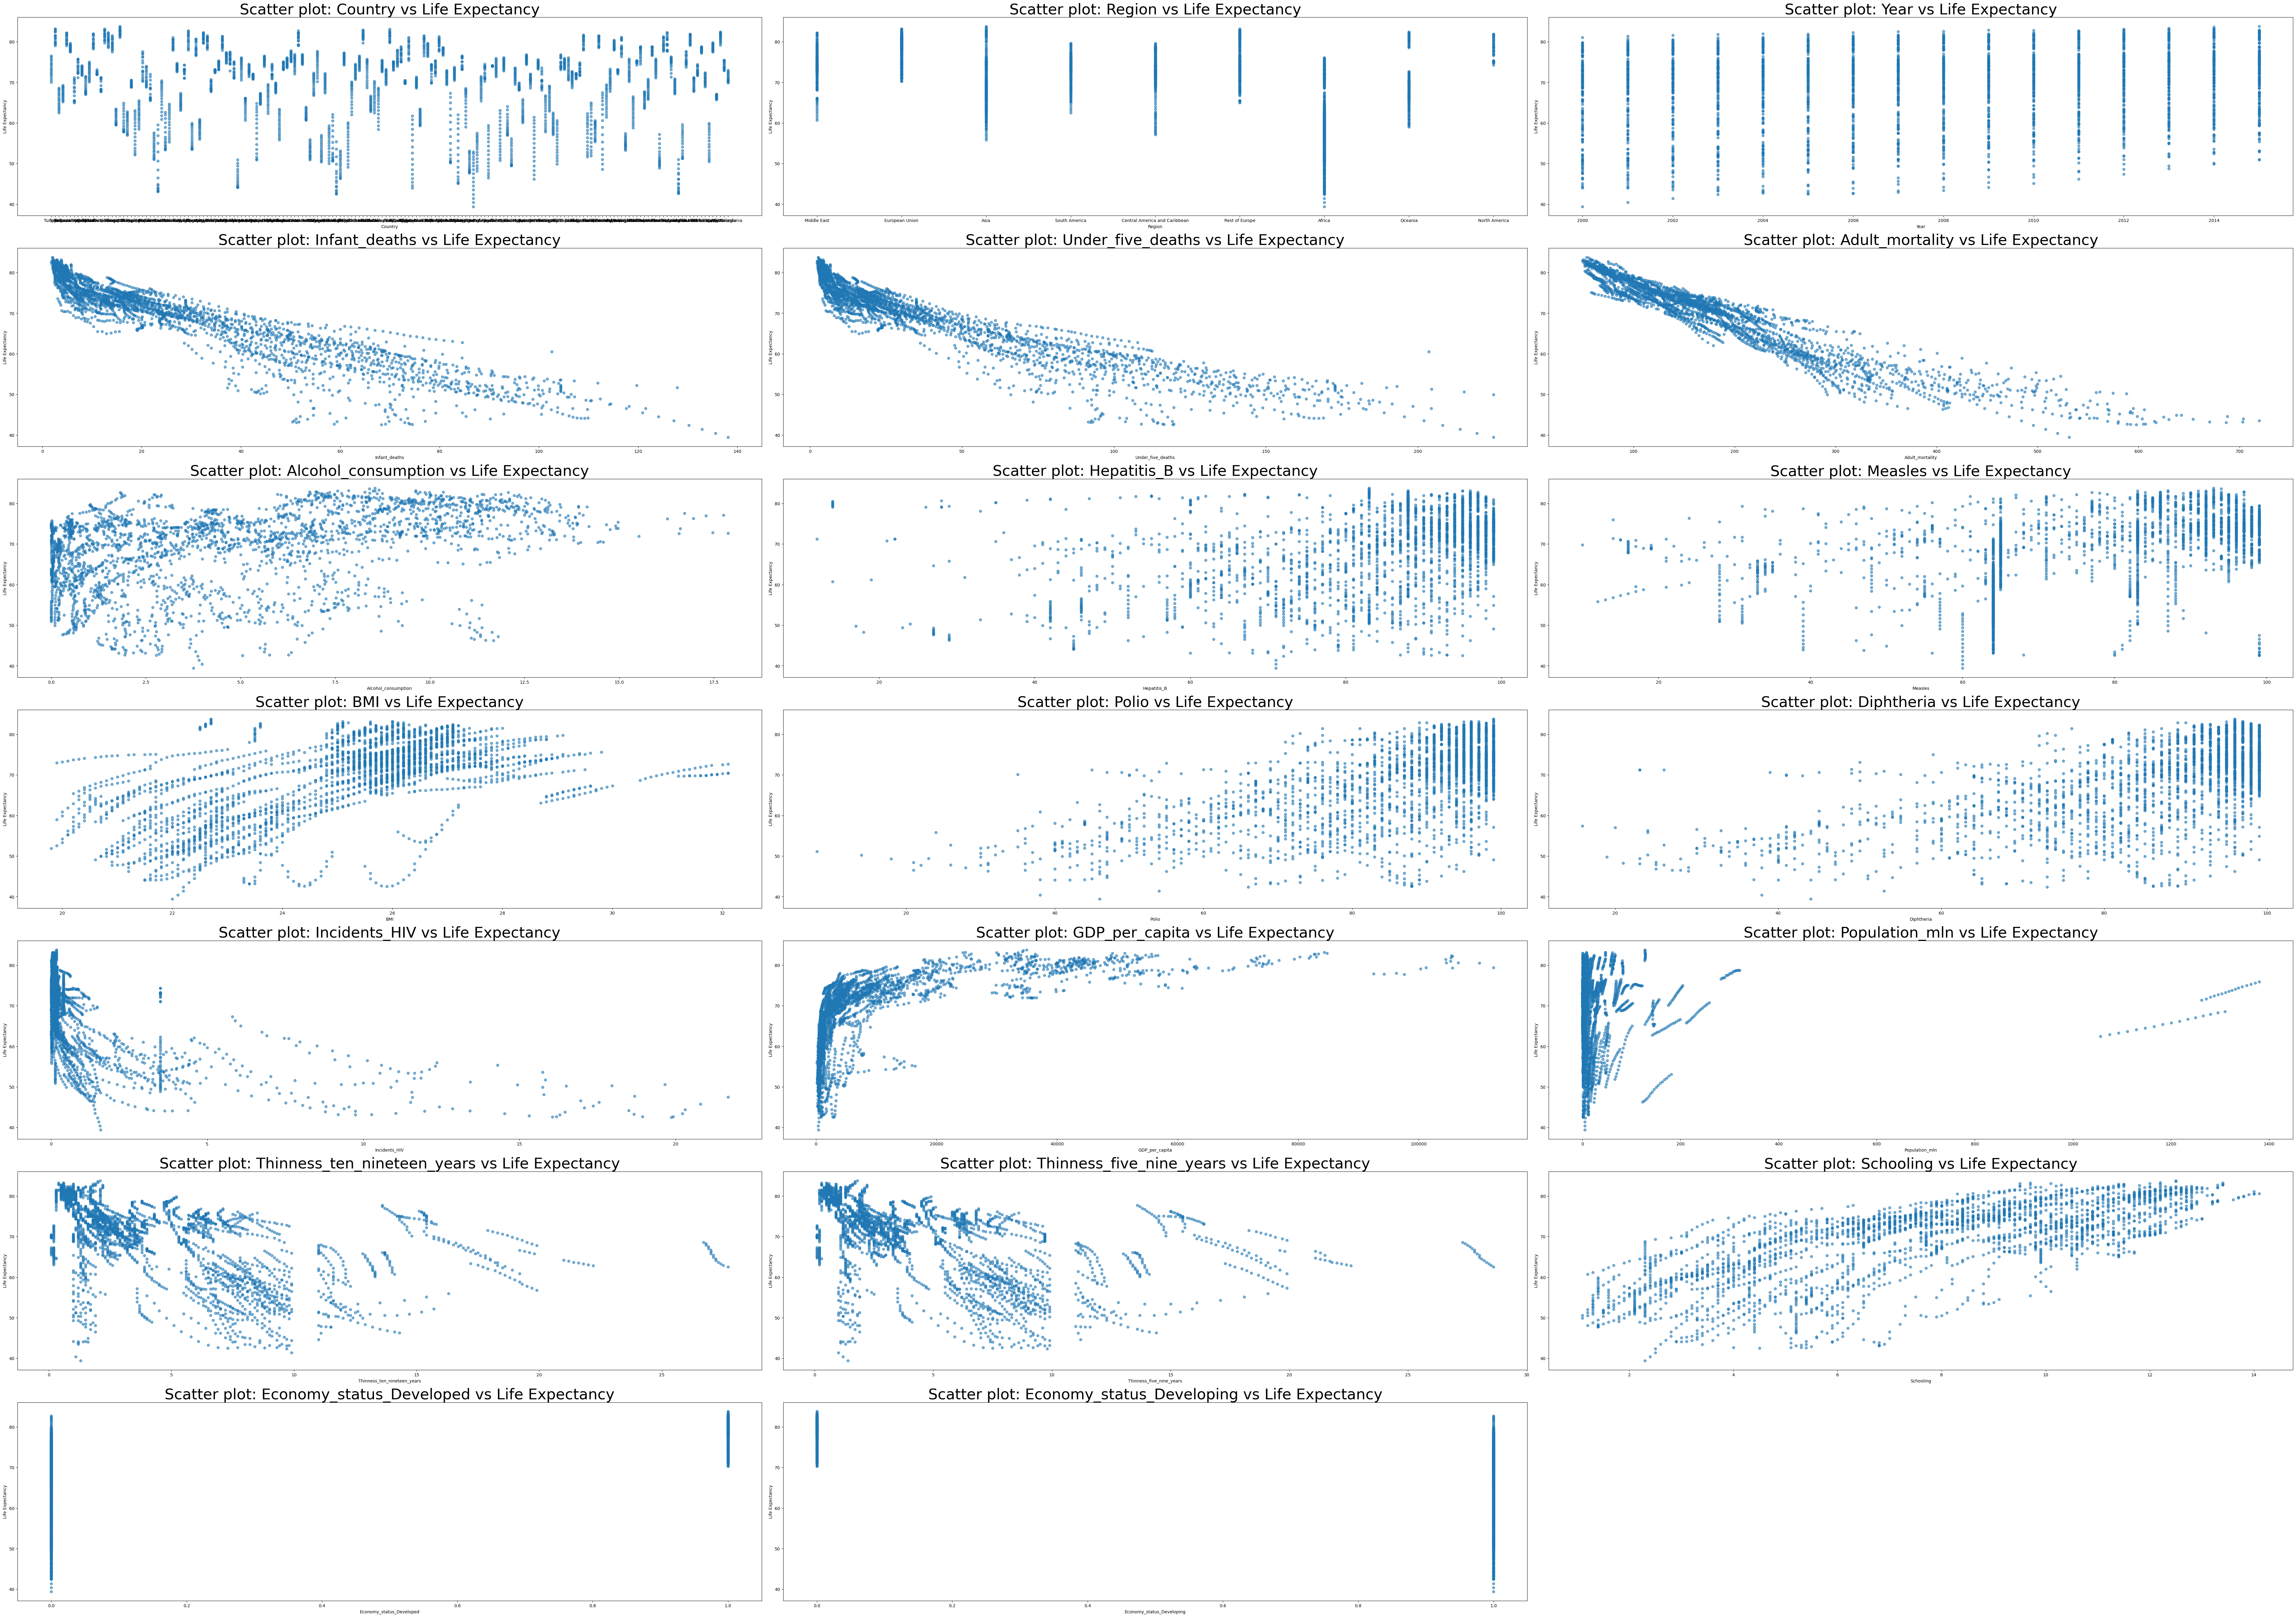

In [ ]:
plt.figure(figsize=(75, 75))                                           
for i, var in enumerate(feat):                                      
    plt.subplot(10, 3, i+1)                                             
    plt.scatter(df[var], df['Life_expectancy'], alpha=0.6)              
    plt.title(f'Scatter plot: {var} vs Life Expectancy', fontsize = 35)
    plt.xlabel(var)                                                    
    plt.ylabel('Life Expectancy')

plt.tight_layout()  
plt.show()

**The relationship between our dependnt and both GDP and HIV looks non-linear**  
<I> Lets take the logs of them and see if this makes the relationship linear </I>

In [ ]:
df['log_GDP_per_capita'] = np.log(df['GDP_per_capita'])
df['log_Incidents_HIV'] = np.log(df['Incidents_HIV'])      

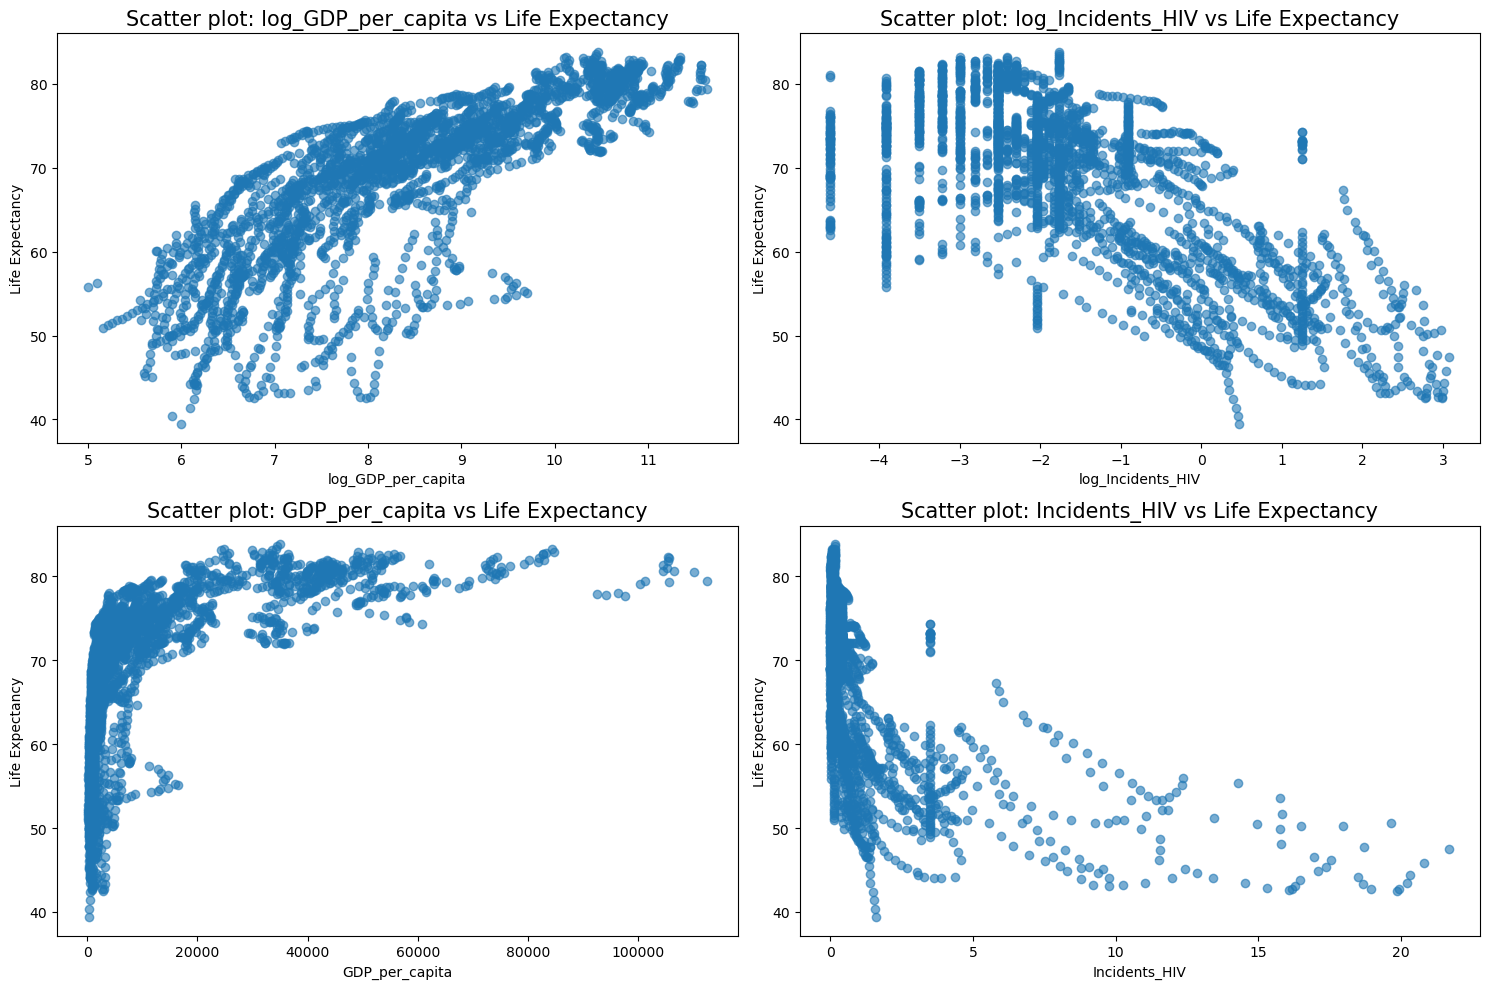

In [ ]:
new = ['log_GDP_per_capita', 'log_Incidents_HIV', 'GDP_per_capita', 'Incidents_HIV']     

plt.figure(figsize=(15, 10))                                                            
for i, var in enumerate(new):
    plt.subplot(2, 2, i+1)  
    plt.scatter(df[var], df['Life_expectancy'], alpha=0.6)
    plt.title(f'Scatter plot: {var} vs Life Expectancy', fontsize=15)
    plt.xlabel(var)
    plt.ylabel('Life Expectancy')

plt.tight_layout()  
plt.show()

**Log transforming HIV and GDP yields a linear relationship with Life Expectancy!**

## 📉Bivariate Analysis Part 2: Relationship between independent variables

### i) Vaccinations

**There are 3 types of vaccinations (Hepititus, Polio and Diphtheria), how corrleated are they?**

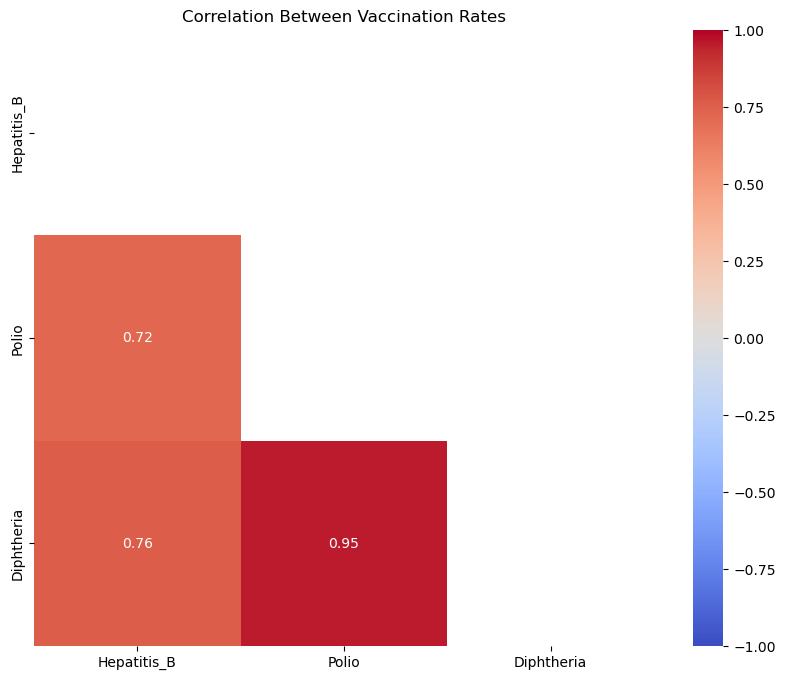

In [ ]:
Vaccines = ['Hepatitis_B', 'Polio', 'Diphtheria']     

df_vaccines = df[Vaccines]                           
plt.figure(figsize=(10, 8))                           
sns.heatmap(df_vaccines.corr(),                         
            annot=True,                                
            vmin=-1, vmax=1,                            
            cmap='coolwarm',                            
            fmt='.2f',                                  
            mask=np.triu(df_vaccines.corr()))         

plt.title("Correlation Between Vaccination Rates")
plt.show()

##### 📌 **Strong Correlations**  
These variables explain each other **well enough** that keeping all could lead to **multicollinearity**.  

👉 We'll keep just **Polio** for further analysis.
---


### ii) Non-adult deaths

**There are 2 types of non-adult deaths (infant deaths and under 5 deaths), how corrleated are they?**

In [9]:
df.Infant_deaths.corr(df.Under_five_deaths)

0.9856513455483953

##### 📌 **Very Strong Correlation**  
Since one variable **almost perfectly explains** the other, keeping both could lead to **multicollinearity**.  
👉 We'll retain **infant deaths** and drop the other.

---


### iii) Thinness

**same story**

In [10]:
df.Thinness_ten_nineteen_years.corr(df.Thinness_five_nine_years)

0.9387571020296347

##### 📌 **Outcome: Very Strong Correlation**  
The **thinness in under 9s** is almost perfectly correlated with **thinness in under 19s** — making it redundant.  
👉 We'll proceed with just **thinness in under 19s** for analysis.

---

### iv) Economic Indicators

**GDP per capita seems to explain the same thing as developing status. Developed economies tend to have higher GDP per capitas.** 

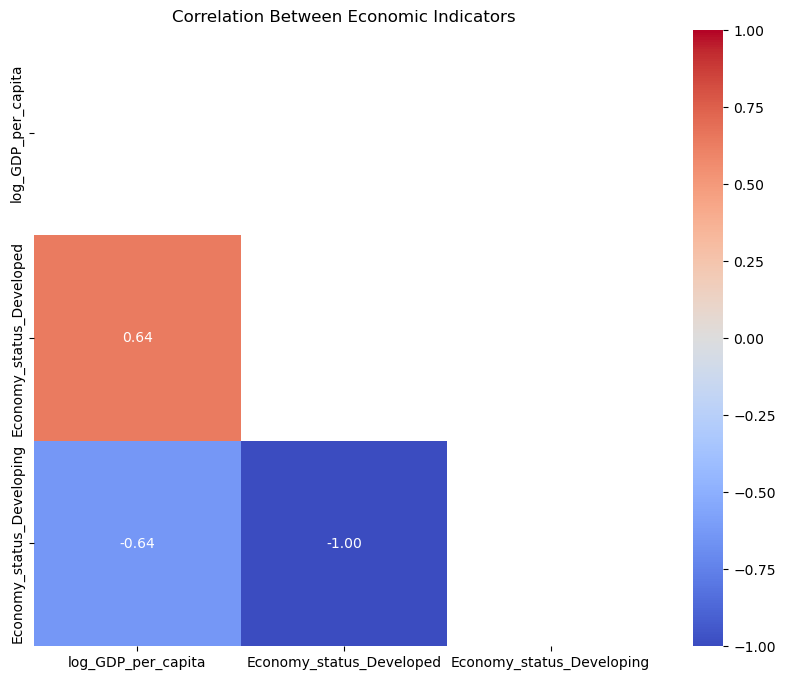

In [ ]:
economic = ['log_GDP_per_capita','Economy_status_Developed', 'Economy_status_Developing']    

df_economic = df[economic]                                                               

plt.figure(figsize=(10, 8))                                                              
sns.heatmap(df_economic.corr(),                                                         
            annot=True,                                                                
            vmin=-1, vmax=1,                                                          
            cmap='coolwarm',                                                           
            fmt='.2f',                                                                  
            mask=np.triu(df_economic.corr()))                                          

plt.title("Correlation Between Economic Indicators")
plt.show()

### 📌 **Strong Correlations**  
The **Developed** and **Developing** metrics are perfectly correlated, so we can't include both.  
👉 Since **GDP per capita** explains them well, we'll retain that one instead.

---

### v) All of the correlations

* Lets consider all of the correlations, excluding the variables we wont be using!

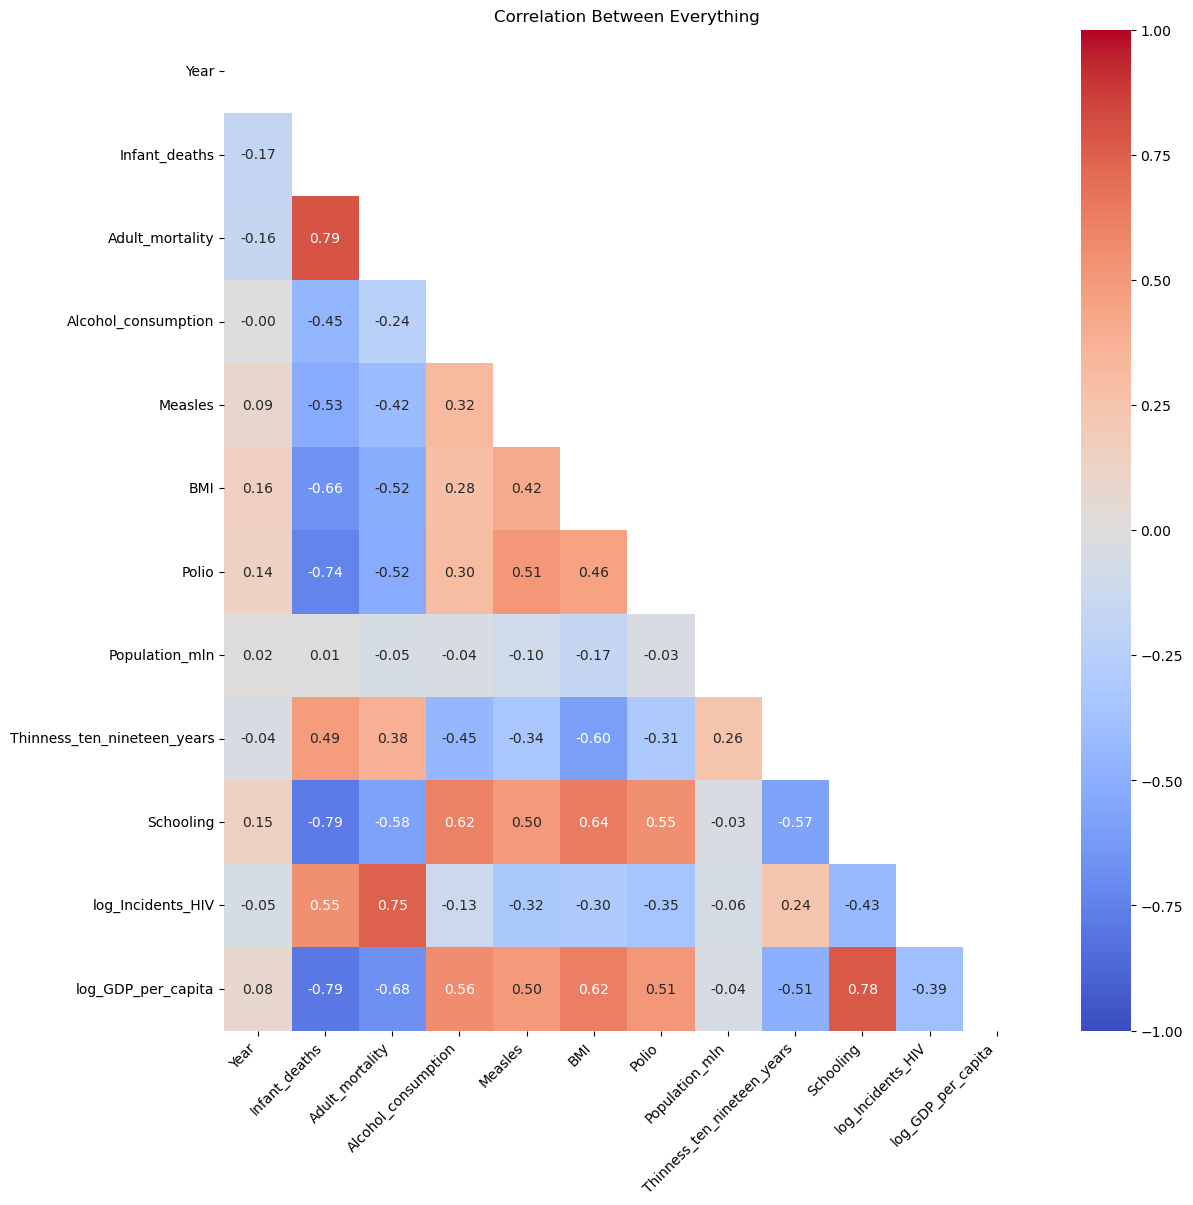

In [ ]:
everything = ['Year', 'Infant_deaths', 'Adult_mortality', 'Alcohol_consumption', 'Measles', 'BMI', 'Polio',
        'Population_mln', 'Thinness_ten_nineteen_years',
        'Schooling',  'log_Incidents_HIV', 'log_GDP_per_capita']       




df_everything = df[everything]                                                           

plt.figure(figsize=(13, 13))                                                            
sns.heatmap(df_everything.corr(),                                                      
            annot=True,                                                                  
            vmin=-1, vmax=1,                                                            
            cmap='coolwarm',                                                            
            fmt='.2f',                                                                  
            mask=np.triu(df_everything.corr()))
                                                       
plt.xticks(rotation=45, ha = 'right')
plt.title("Correlation Between Everything")
plt.show()

It is well documented [(see here for example)](https://stataiml.com/posts/60_multicollinearity_threshold_ml/) that a value of 0.8 for a correlation coefficient is deemed to be the threshold beyond which multicolinearity becomes a problem. None of our values exceed this threshold.

📌 Multicollinearity Check
It is well documented that a correlation coefficient of 0.8 is considered the threshold for multicollinearity issues ([source](https://stataiml.com/posts/60_multicollinearity_threshold_ml/)).  
👉 None of our values exceed this threshold, so multicollinearity is not a concern.